In [ ]:
The aim of our study is to answer the below research questions:
a) Does coach_price varies during the weekend?
b) Does $500 seen as a good price for a coach ticket?
c) Predicting of coach_price with thr prediction model

In [41]:
#for data manuipulation
import pandas as pd
import numpy as np

#for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [42]:
#Reading out the data.
flight=pd.read_csv('flight.csv')
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [43]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [44]:
flight.describe(percentiles=[0.05,0.1,0.25,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
miles,129780.0,2006.224696,943.034768,12.000,662.00000,762.000,1343.000,1986.00,2468.00000,3640.00,3998.00000,4548.000
passengers,129780.0,207.723155,12.776363,135.000,184.00000,197.000,204.000,210.00,215.00000,220.00,223.00000,244.000
delay,129780.0,13.162845,41.941680,0.000,0.00000,6.000,9.000,10.00,13.00000,24.00,30.00000,1560.000
coach_price,129780.0,376.585253,67.744274,44.415,257.99975,286.355,331.445,380.56,426.67625,460.49,479.24525,593.635
firstclass_price,129780.0,1454.931785,162.590434,939.100,1177.27950,1216.710,1302.200,1503.84,1582.37000,1637.65,1669.96000,1846.780
hours,129780.0,3.631214,1.739118,1.000,1.00000,1.000,2.000,4.00,4.00000,7.00,7.00000,8.000


In [45]:
#Check for null values
flight.isna().sum()

miles                     0
passengers                0
delay                     0
inflight_meal             0
inflight_entertainment    0
inflight_wifi             0
day_of_week               0
redeye                    0
weekend                   0
coach_price               0
firstclass_price          0
hours                     0
dtype: int64

In [46]:
#Checking if there is any Duplicate value present in the dataset?
flight.duplicated().sum()

0

In [47]:
flight.shape

(129780, 12)

In [48]:

flight['day_of_week'].value_counts(normalize=True) 

Saturday     0.259948
Sunday       0.218046
Friday       0.174210
Monday       0.108376
Tuesday      0.087772
Wednesday    0.086462
Thursday     0.065187
Name: day_of_week, dtype: float64

In [49]:
flight.day_of_week.describe()

count       129780
unique           7
top       Saturday
freq         33736
Name: day_of_week, dtype: object

[Text(0.5, 0, 'day_of_airline'), Text(0, 0.5, 'count')]

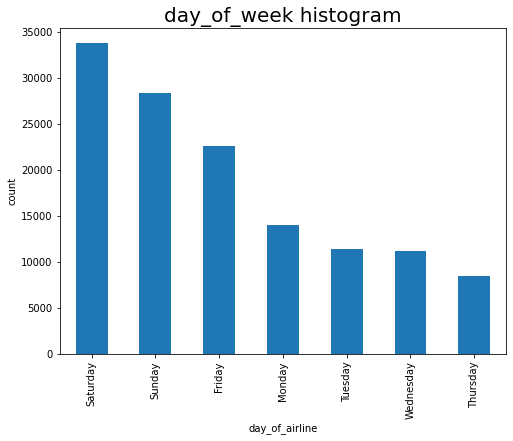

In [50]:
plt.figure(figsize=(8, 6))
plt1 = flight.day_of_week.value_counts().plot(kind='bar')
plt.title('day_of_week histogram', fontsize=20)
plt1.set(xlabel = 'day_of_airline', ylabel='count')


<AxesSubplot:ylabel='day_of_week'>

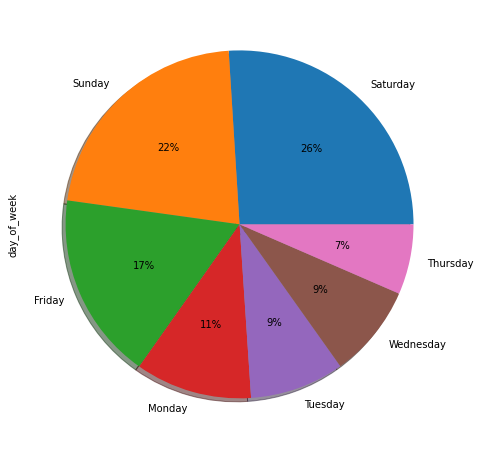

In [51]:
plt.figure(figsize=(10,8))
s = flight["day_of_week"].value_counts(ascending=False).plot(kind ="pie", autopct='%1.0f%%', shadow=True)
s

In [52]:


     Above Analysis shows,

   
    > With highest frequency, Saturday is the most preferred Day_of_week by passengers and Thutsday is the least preferred day_of_week.



SyntaxError: invalid syntax (<ipython-input-52-404f2c3d5c91>, line 1)

In [53]:
flight['passengers'].value_counts()

210    6299
209    6071
211    6016
212    5984
208    5962
       ... 
140       1
138       1
243       1
241       1
136       1
Name: passengers, Length: 109, dtype: int64

In [54]:
flight['weekend'].value_counts(normalize= True) 


Yes    0.652204
No     0.347796
Name: weekend, dtype: float64

<AxesSubplot:title={'center':'weekend Histogram'}, xlabel='weekend', ylabel='count'>

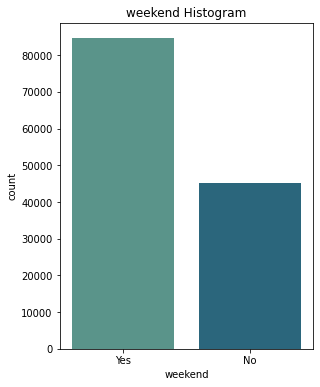

In [55]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('weekend Histogram')
sns.countplot(flight['weekend'], palette=("crest"))



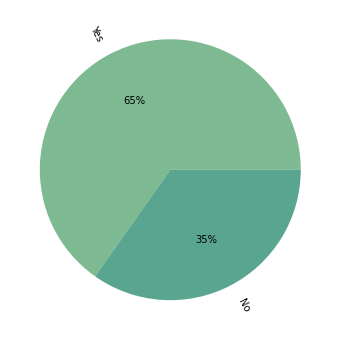

In [56]:
def pie_chart(x):
    palette_color = sns.color_palette('crest')

    values = [  ]
    for i in x.value_counts():
        values.append(i)

    label = x.unique()
    
    plt.pie(values, labels=label, colors=palette_color ,autopct='%.0f%%', rotatelabels=True )
    
    return plt.show()

plt.figure(figsize=(10,6))
pie_chart(flight["weekend"])

In [57]:


Above Analysis shows,

    Weekend has two values: Yes and No.
    It contains information on  WEEKEND. YES IN WEEKEND flights are higher in number in comparison with NO in weekend  as you can see about 65% of people booked tickets in weekend.



SyntaxError: invalid syntax (<ipython-input-57-01f20bfcf648>, line 1)

In [ ]:
flight.hours.describe()

In [58]:
flight.hours.unique()


array([1, 6, 3, 2, 4, 7, 5, 8])

<AxesSubplot:xlabel='hours'>

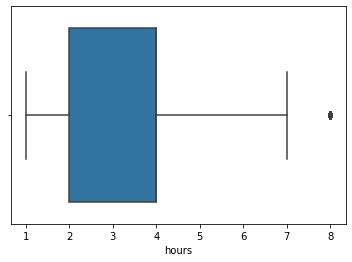

In [59]:
sns.boxplot(flight['hours'])

In [60]:
.This shows the number of hours between booking time and day.
.It is showing a range from 1-8 hours between booking time and day .
 

SyntaxError: invalid syntax (<ipython-input-60-dc4af248078f>, line 1)

In [61]:
flight.coach_price.describe()

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

<AxesSubplot:xlabel='coach_price'>

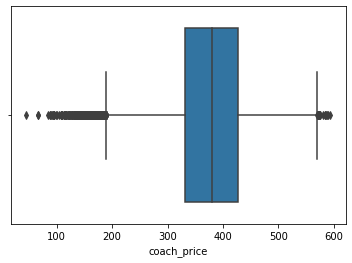

In [62]:
sns.boxplot(flight['coach_price'])

In [63]:
The above shows the coach_price of flights.

SyntaxError: invalid syntax (<ipython-input-63-f38f79649d2a>, line 1)

<AxesSubplot:xlabel='coach_price', ylabel='Density'>

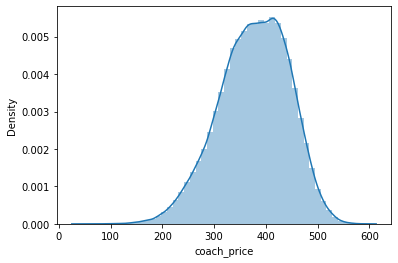

In [64]:
sns.distplot(flight['coach_price'])

In [65]:
 the above shows:
    the mean is around 350, we can see here that the median is approximately 430. 
    This difference is explainable by the presence of days of the week. 
    On the graph, we can see that the dispersion seems to be composed by two gaussian curves.

SyntaxError: invalid syntax (<ipython-input-65-68a235c8df27>, line 1)

In [ ]:
x = flight["day_of_week"]
y = flight["coach_price"]
colors = flight["coach_price"]
sizes = flight["coach_price"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.title('relationship between coach_price vs day_of_week')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar();

In [ ]:
the above shows how the price vary during the days of the week saturday have the highest price variation, 
monday is the lowest.

In [ ]:
1. DOES COACH_PRICE VARYS DURING THE DAY_OF_WEEK

In [ ]:
flight.groupby('day_of_week')['coach_price'].mean().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(8,7))
sns.barplot(x="day_of_week" , y ="coach_price" ,ci=False , data=flight,)
plt.xlabel("days of the week ", fontsize=40)
plt.ylabel("coach Price", fontsize=30)
plt.title("coach_price variation during the week" ,  fontsize=20)
plt.legend(loc='best')
plt.show()

In [66]:
#2.Does $500 seen as a good price for a coach ticket?
flight['coach_price'].describe()

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

<AxesSubplot:xlabel='coach_price', ylabel='Count'>

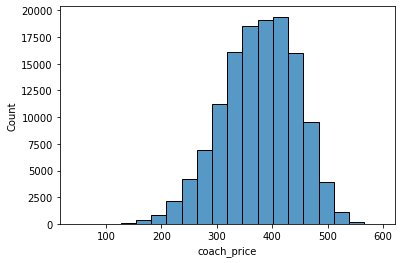

In [67]:
sns.histplot(x='coach_price',data=flight,bins=20)

In [68]:
#TRAIN OUR MODEL 

X = flight[['passengers', 'delay', 'hours',]]

y = flight[['coach_price']]

#Let's train our model by import necessary libraries (RandomForestRegressor and train_test_split)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Splitting data into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 101)


# Train the Model


regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)

regr.fit(X_train, y_train.values.ravel())



RandomForestRegressor(max_depth=10, n_estimators=10, random_state=101)

In [69]:
#Final step, let's predict the coach_price with trained data.
import warnings
warnings.filterwarnings('ignore')


# Make prediction
predictions = regr.predict(X_test)


result = X_test
result['price'] = y_test
result['prediction'] = predictions.tolist()


result.head(3)


,passengers,delay,hours,price,prediction
37167,211,8,8,402.110,432.702046
10175,214,10,1,230.335,346.149892
58788,202,9,4,288.000,382.920988


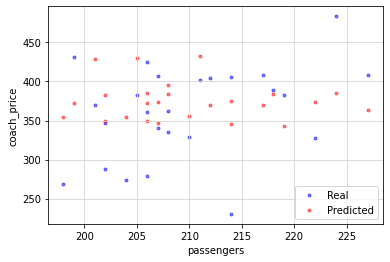

In [72]:
#(We added new prediction column at the end which contains our model's predicted prices. 
#On first row, actual price is 1781 but prediction is 1700.
#We can't compare line by line when data is huge. It's always useful to visualize the results before evaluation.
#So let's visualize our results using matplotlib's scatter graph.)
# Define x axis
x_axis = X_test.passengers


# Build scatterplot

plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

plt.xlabel('passengers')
plt.ylabel('coach_price')

plt.grid(color = '#D3D3D3', linestyle = 'solid')

plt.legend(loc = 'lower right')

plt.show()


In [ ]:
On this scatter graph, results looks promising - specially for smaller Carats. Blue dots are real prices and Red dots are prices our model predicted. But as being Data Analyst or Data Scientist, our job does not stop here. We must see how good or bad our model is based on statistical formula. In the next step, we will evaluate our model.